In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import IPython
import ipywidgets as iw
from stimuli.utils import plot_stimuli, plot_stim

# wedding_cake_stimulus

In [2]:
from stimuli.illusions.wedding_cake import wedding_cake_stimulus

## Parameterization

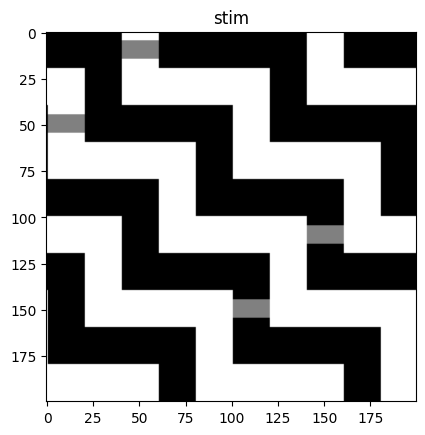

In [6]:
params = {
    "visual_size": (10., 10.),
    "ppd": 20.0,
    "L_size": (3., 3., 1.),
    "target_height": 0.5,
    "target_indices1": ((0, 0), (0, 1)),
    "target_indices2": ((2, 0), (2, 1)),
    "intensity_grating": (0., 1.),
    "intensity_target": 0.5,
}
    
stim = wedding_cake_stimulus(**params)
plot_stim(stim)
plt.show()

## Interactive

In [9]:
# Define widgets
w_height = iw.IntSlider(value=10, min=5, max=16, description="height [deg]")
w_width = iw.IntSlider(value=10, min=5, max=16, description="width [deg]")
w_ppd = iw.IntSlider(value=10, min=10, max=30, description="ppd")
w_size = iw.HBox([w_height, w_width, w_ppd])

w_lheight = iw.FloatSlider(value=3, min=1, max=5, description="L-height [deg]")
w_lwidth = iw.FloatSlider(value=3, min=1, max=5, description="L-width [deg]")
w_lthick = iw.FloatSlider(value=0.5, min=0.1, max=3, description="L-thickness [deg]")
w_lsize = iw.HBox([w_lheight, w_lwidth, w_lthick])

w_theight = iw.FloatSlider(value=0.2, min=0.1, max=1., description="target height")
w_tidx1 = iw.IntSlider(value=0, min=0, max=5, description="target index 1")
w_tidx2 = iw.IntSlider(value=0, min=-3, max=3, description="target index 2")
w_target = iw.HBox([w_theight, w_tidx1, w_tidx2])

ui = iw.VBox([w_size, w_lsize, w_target])

def show_wedding_cake(
    height=None,
    width=None,
    ppd=None,
    Lheight=None,
    Lwidth=None,
    Lthick=None,
    target_height=None,
    tidx1=None,
    tidx2=None,
):

    stim = wedding_cake_stimulus(
        visual_size=(height, width),
        ppd=ppd,
        L_size=(Lheight, Lwidth, Lthick),
        target_height=target_height,
        target_indices1=((tidx1, tidx2),),
        target_indices2=None,
        intensity_grating=(0., 1.),
        intensity_target=0.5,
    )
    plot_stim(stim)


out = iw.interactive_output(show_wedding_cake,
                            {
                                "height": w_height,
                                "width": w_width,
                                "ppd": w_ppd,
                                "Lheight": w_lheight,
                                "Lwidth": w_lwidth,
                                "Lthick": w_lthick,
                                "target_height": w_theight,
                                "tidx1": w_tidx1,
                                "tidx2": w_tidx2,
                            })

display(ui, out)


Output()